# Assignment_25

## In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost.

In [124]:
#import libraries
import numpy as np
import pandas as pd

In [125]:
#Loading dataset

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [126]:
# column names and assigning them to train and test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [127]:
# test set first five rows
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [128]:
# to check statistics of numerical features.
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [129]:
# created a column in train and test set train_id and test_id respectively.
train_set['train_ind'] = 1

In [130]:
test_set['train_ind'] = 0

In [131]:
#combined data 
combined_data = train_set.append(test_set)

In [132]:
#size of combined data
combined_data.shape

(48842, 16)

In [133]:
# Columns of the dataset
combined_data.describe(include = ['O']).columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype='object')

#### in this dataset missing values are denoted as ? so inorder to determine number of nulls we convert ? with np.nan.

In [134]:
df1 = combined_data.replace(' ?', np.nan)

In [135]:
# columns and number of nulls in that columns
df1.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
train_ind            0
dtype: int64

In [136]:
# Filling NaN with ' unknown'
df1.fillna(' unknown', inplace = True)

In [137]:
# after fillna now there is no missing values in the features set.
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
train_ind         0
dtype: int64

Target variable in the dataset is a binary variable which will classify data into two categories: 1. one who earns equal to or more than 50 K and the one who don't. Here we have created a column as Target_variable and assign 0 to all the rows. then we assigned 1 to the rows where 'wage_class' has entry as ' >50K' or ' >50K.'. In this way we have two classes in the Target_variable: 1 for those with income 50K and more  and 0 for rest.

In [138]:
df1['wage_class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [139]:
df1['target_variable'] = 0

In [140]:
df1.loc[df1['wage_class'] == ' >50K' ,'target_variable'] = 1

In [141]:
df1.loc[df1['wage_class'] == ' >50K.' ,'target_variable'] = 1

In [142]:
df1['target_variable'].value_counts()

0    37155
1    11687
Name: target_variable, dtype: int64

In [143]:
df1.shape

(48842, 17)

In [144]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,train_ind,target_variable
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


#### creating dummies for all the categorical variables. starting from relationship:

In [145]:
df1['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [146]:
dummies = pd.get_dummies(df1['relationship'], prefix = 'relationship') # this command will create as many columns as many categories 
# in the dataset and new columns will have relationship as prefix.

#df1 = df1.join(dummies)

In [147]:
df1 = pd.concat([df1,dummies],axis = 1)

In [148]:
df1.shape

(48842, 23)

In [149]:
dummies.shape

(48842, 6)

In [150]:
#dropping original columns from the dataframe whose we have added dummies.
df1.drop('relationship', axis = 1, inplace = True)

In [151]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,sex,capital_gain,...,native_country,wage_class,train_ind,target_variable,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,...,United-States,<=50K,1,0,0,1,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,...,United-States,<=50K,1,0,1,0,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,...,United-States,<=50K,1,0,0,1,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,...,United-States,<=50K,1,0,1,0,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,...,Cuba,<=50K,1,0,0,0,0,0,0,1


In [152]:
df1.shape

(48842, 22)

In [153]:
# performing one hot encoding on each categorical variable. Due to memory limitation can't put on loop.

In [154]:
df1.describe(include = ['O']).columns

Index(['workclass', 'education', 'marital_status', 'occupation', 'race', 'sex',
       'native_country', 'wage_class'],
      dtype='object')

In [155]:
dummies_workclass = pd.get_dummies(df1['workclass'], prefix = 'workclass')

In [156]:
dummies_education = pd.get_dummies(df1['education'], prefix = 'education')

In [157]:
dummies_marital_status = pd.get_dummies(df1['marital_status'], prefix = 'marital_status')

In [158]:
dummies_occupation = pd.get_dummies(df1['occupation'], prefix = 'occupation')

In [159]:
dummies_race = pd.get_dummies(df1['race'], prefix = 'race')

In [160]:
dummies_sex = pd.get_dummies(df1['sex'], prefix = 'sex')

In [161]:
df1 = pd.concat([df1,dummies_workclass,dummies_education,
                 dummies_marital_status,dummies_occupation,dummies_race,dummies_sex],axis = 1)

### Dropped redundant columns

In [162]:
df1.drop(['workclass', 'education', 'marital_status', 'occupation', 'race', 'sex',
          'wage_class'], axis = 1, inplace = True)

In [163]:
df1.shape

(48842, 69)

In [164]:
df1['country']= 0

In [165]:
df1.loc[df1['native_country'] == ' United-States' ,'country'] = 1

In [166]:
df1['country'].value_counts()

1    43832
0     5010
Name: country, dtype: int64

In [167]:
df1.drop('native_country', axis = 1, inplace = True)

In [168]:
df1.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,train_ind,target_variable,relationship_ Husband,relationship_ Not-in-family,...,occupation_ Transport-moving,occupation_ unknown,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,country
0,39,77516,13,2174,0,40,1,0,0,1,...,0,0,0,0,0,0,1,0,1,1
1,50,83311,13,0,0,13,1,0,1,0,...,0,0,0,0,0,0,1,0,1,1
2,38,215646,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,1,0,1,1
3,53,234721,7,0,0,40,1,0,1,0,...,0,0,0,0,1,0,0,0,1,1
4,28,338409,13,0,0,40,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [169]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [170]:
final_train_set = df1[df1["train_ind"] == 1]

In [171]:
final_train_set.shape

(32561, 69)

In [172]:
final_test_set = df1[df1["train_ind"] == 0]

In [173]:
final_test_set.shape

(16281, 69)

In [174]:
# select features
y = final_train_set.pop('target_variable')

In [175]:
y.shape

(32561,)

In [176]:
X = final_train_set

#### Train test split

In [177]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [178]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [179]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

In [180]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1520
Accuracy: 0.84


In [181]:
#Import Xgboost
import xgboost as xgb

In [182]:
# to feed data to xgboost first training set is transformed into Dmatrix. in code below train and test sets are transformed.

xgtrain = xgb.DMatrix(X_train, label = y_train)
xgtest = xgb.DMatrix(X_test, label = y_test)

In [183]:
# to see out output 
watchlist = [(xgtrain,'train'),(xgtest, 'eval')]

In [184]:
# parameters

params = {}
params["objective"] =  "binary:logistic"
params["booster"] = "gbtree"
params["max_depth"] = 7
params["eval_metric"] = 'auc'
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8
params["silent"] = 1
params["seed"] = 4
params["eta"] = 0.1

plst = list(params.items())

In [185]:
#Running the model with 15 iterations and parameters defined above

num_rounds = 150
model_cv = xgb.train(plst, xgtrain, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-auc:0.887683	eval-auc:0.885437
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.907968	eval-auc:0.902874
[2]	train-auc:0.911846	eval-auc:0.906954
[3]	train-auc:0.913465	eval-auc:0.908074
[4]	train-auc:0.914303	eval-auc:0.908582
[5]	train-auc:0.916501	eval-auc:0.910232
[6]	train-auc:0.91838	eval-auc:0.911613
[7]	train-auc:0.918808	eval-auc:0.911858
[8]	train-auc:0.921271	eval-auc:0.913248
[9]	train-auc:0.923025	eval-auc:0.914452
[10]	train-auc:0.924712	eval-auc:0.915801
[11]	train-auc:0.925845	eval-auc:0.916322
[12]	train-auc:0.926668	eval-auc:0.91701
[13]	train-auc:0.927246	eval-auc:0.917485
[14]	train-auc:0.927987	eval-auc:0.918052
[15]	train-auc:0.928293	eval-auc:0.918245
[16]	train-auc:0.929208	eval-auc:0.918609
[17]	train-auc:0.92952	eval-auc:0.918777
[18]	train-auc:0.929913	eval-auc:0.919108
[19]	train-auc:0.93046	eval-auc:0.919413
[20]	train-auc:0.930741	eval-auc:

In [186]:
### Clearly training AUC is 95% and validation AUC is 92%. Model does very well on unseen data as well.


In [187]:
feat_imp = pd.Series(model_cv.get_fscore()).sort_values(ascending=False)

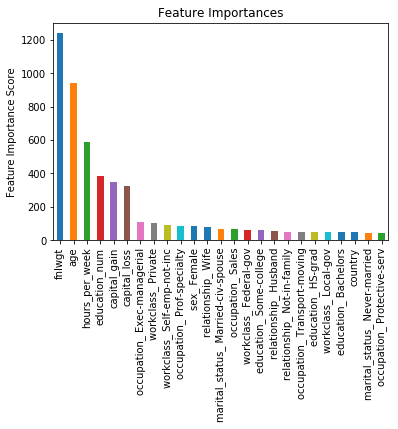

In [188]:
import matplotlib.pyplot as plt
feat_imp[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()